---
<h1 style="text-align:center;"> Fashion MNIST</h1>

---

Dataset Information:

Fashion-MNIST is a dataset consisting of images of Zalando's articles. The dataset serves as a replacement for the original MNIST dataset and includes a training set of 60,000 examples and a test set of 10,000 examples. Each image is a grayscale 28x28 pixel image, associated with a label from 10 different classes. The goal is to provide a benchmark for machine learning algorithms, maintaining the same image size and structure as the original MNIST dataset.

Original MNIST dataset, known for handwritten digits, is widely used in the AI/ML/Data Science community for algorithm validation. The popularity stems from the belief that "If it doesn't work on MNIST, it won't work at all" and, conversely, "If it works on MNIST, it may still fail on others."

Zalando aims to replace the original MNIST dataset with Fashion-MNIST.

Dataset Details:
- Each image has dimensions of 28 pixels in height and 28 pixels in width, totaling 784 pixels.
- Pixel values range from 0 to 255, indicating the lightness or darkness of the pixel, with higher values indicating darker pixels.
- The dataset contains 785 columns, with the first column representing the class labels (clothing types), and the remaining columns containing pixel-values of the associated images.

Pixel Location:
- To locate a pixel in the image, use the formula x = i * 28 + j, where i and j are integers between 0 and 27. This formula represents the position of the pixel in a 28x28 matrix.

Labels:
- Each training and test example is labeled with one of the following classes:
  - 0: T-shirt/top
  - 1: Trouser
  - 2: Pullover
  - 3: Dress
  - 4: Coat
  - 5: Sandal
  - 6: Shirt
  - 7: Sneaker
  - 8: Bag
  - 9: Ankle boot

Summary:
- Each row in the dataset represents a separate image.
- Column 1 contains the class label.
- The remaining columns represent pixel numbers (784 total).
- Each value in the dataset corresponds to the darkness of the pixel, ranging from 1 to 255.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, learning_curve, validation_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# split our data to X and y
X_train = train_data.drop("label", axis=1).values
y_train = train_data["label"].values
X_test = test_data.drop("label", axis=1).values
y_test = test_data["label"].values

In [4]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

#normalising the data
X_train /= 255 
X_test /= 255

---
<h3 style="text-align:center;"> Models</h3>

---

In [5]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=9)

In [5]:
import time
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [6]:
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}


In [8]:
def perform_cross_validation(model, X, y, n_folds=5):
    try:
        start_time = time.time()

        cv_scores = cross_val_score(model, X, y, cv=n_folds)

        end_time = time.time()

        elapsed_time = end_time - start_time

        print("Cross-Validation Scores:", cv_scores)
        print("Average CV Score:", cv_scores.mean())
        print(f"Elapsed Time: {elapsed_time} seconds")
    except Exception as e:
        print(f"An error occurred while cross-validating {type(model).__name__}: {e}")

In [10]:

# Example usage of the loop
for model_name, model in models.items():
    print(f"=== {model_name} ===")
    perform_cross_validation(model, X_train, y_train, n_folds=5)
    print("================\n")

=== Naive Bayes ===
Cross-Validation Scores: [0.59783333 0.57675    0.60958333 0.59758333 0.58616667]
Average CV Score: 0.5935833333333334
Elapsed Time: 13.132946729660034 seconds

=== Logistic Regression ===
Cross-Validation Scores: [0.85558333 0.85425    0.85825    0.85416667 0.85233333]
Average CV Score: 0.8549166666666667
Elapsed Time: 79.93741965293884 seconds

=== Decision Tree ===
Cross-Validation Scores: [0.79241667 0.79233333 0.79333333 0.79616667 0.79233333]
Average CV Score: 0.7933166666666667
Elapsed Time: 349.01535987854004 seconds

=== SVM ===
Cross-Validation Scores: [0.88775    0.88691667 0.8945     0.88491667 0.88441667]
Average CV Score: 0.8876999999999999
Elapsed Time: 2523.4591178894043 seconds

=== Random Forest ===
Cross-Validation Scores: [0.87908333 0.8815     0.88275    0.87833333 0.88258333]
Average CV Score: 0.88085
Elapsed Time: 850.1695411205292 seconds

=== XGBoost ===
Cross-Validation Scores: [0.90133333 0.9025     0.90425    0.90058333 0.89908333]
Averag

In [11]:
from sklearn.decomposition import PCA

# Assuming X_train is your training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Choose the number of components to keep (e.g., 95% of the variance)
target_variance = 0.95
num_components = next(i for i, cum_var in enumerate(pca.explained_variance_ratio_.cumsum()) if cum_var >= target_variance)

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)


In [12]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
X_train_pca.shape, X_test_pca.shape

((60000, 186), (10000, 186))

In [14]:
# Example usage of the loop
for model_name, model in models.items():
    print(f"=== {model_name} ===")
    perform_cross_validation(model, X_train_pca, y_train, n_folds=5)
    print("================\n")

=== Naive Bayes ===
Cross-Validation Scores: [0.74666667 0.74641667 0.74808333 0.74391667 0.75008333]
Average CV Score: 0.7470333333333333
Elapsed Time: 1.8628146648406982 seconds

=== Logistic Regression ===
Cross-Validation Scores: [0.85416667 0.85283333 0.85441667 0.85041667 0.85291667]
Average CV Score: 0.8529500000000001
Elapsed Time: 18.182113647460938 seconds

=== Decision Tree ===
Cross-Validation Scores: [0.75733333 0.75683333 0.76108333 0.75791667 0.75725   ]
Average CV Score: 0.7580833333333332
Elapsed Time: 363.16396045684814 seconds

=== SVM ===
Cross-Validation Scores: [0.89091667 0.89391667 0.89591667 0.88825    0.89133333]
Average CV Score: 0.8920666666666666
Elapsed Time: 975.1259844303131 seconds

=== Random Forest ===
Cross-Validation Scores: [0.86408333 0.86333333 0.86891667 0.85883333 0.86166667]
Average CV Score: 0.8633666666666666
Elapsed Time: 1777.7181723117828 seconds

=== XGBoost ===
Cross-Validation Scores: [0.88083333 0.88066667 0.88666667 0.87883333 0.8805

In [11]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_classification_report = classification_report(y_test, lr_predictions)
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.81      0.79      1000
           5       0.93      0.92      0.92      1000
           6       0.66      0.60      0.63      1000
           7       0.91      0.91      0.91      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.86     10000
weighted avg       0.85      0.86      0.86     10000



c:\Users\tsentelisd\OneDrive - Vodafone Group\Desktop\Temp\Machine-Learning-2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

svm_report = classification_report(y_test, svm_predictions)
print(svm_report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.95      0.97      0.96      1000
           2       0.70      0.67      0.68      1000
           3       0.82      0.80      0.81      1000
           4       0.67      0.69      0.68      1000
           5       0.90      0.87      0.88      1000
           6       0.56      0.56      0.56      1000
           7       0.86      0.85      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [56]:
# random forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.87      0.84      1000
           5       0.97      0.95      0.96      1000
           6       0.74      0.59      0.66      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [1]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [10]:
rf_model = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=5, scoring='accuracy', random_state=9)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


c:\Users\tsentelisd\OneDrive - Vodafone Group\Desktop\Temp\Machine-Learning-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tsentelisd\OneDrive - Vodafone Group\Desktop\Temp\Machine-Learning-2\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tsentelisd\OneDrive - Vodafone Group\Desktop\Temp\Machine-Learning-2\.venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}


In [12]:
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

best_rf_predictions = best_rf_model.predict(X_test)
print(classification_report(y_test, best_rf_predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.90      0.93      0.91      1000
           4       0.81      0.86      0.83      1000
           5       0.98      0.95      0.96      1000
           6       0.74      0.63      0.68      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.98      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



One method

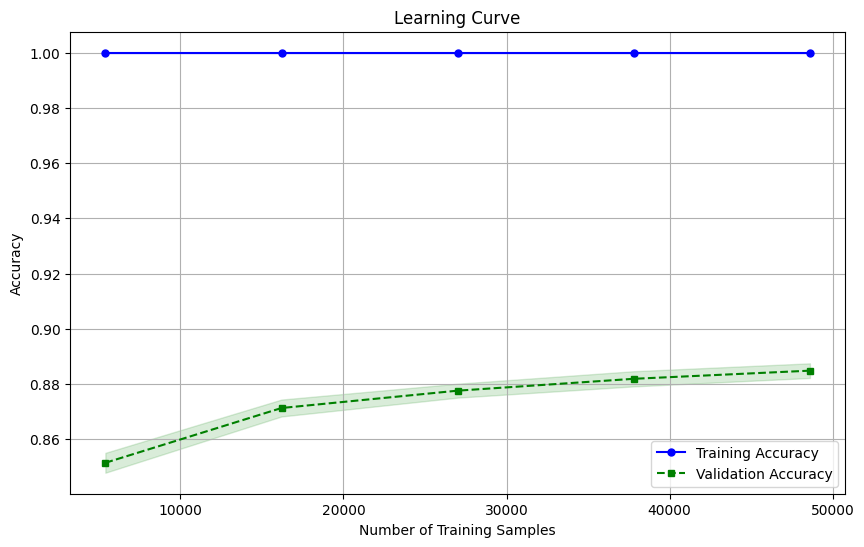

In [13]:

learning_curve_model = RandomForestClassifier(**best_params)
train_sizes, train_scores, test_scores = learning_curve(
    learning_curve_model, X_train, y_train, cv=10, scoring='accuracy', train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], shuffle=True
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()